## Análise inicial dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dados = pd.read_csv(r"C:/Users/jvitt/OneDrive/Documentos/dados_totais.csv",  encoding="utf-8")

In [3]:
dados

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,7.819839e+08
1,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,2.688272e+08
2,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,1.491228e+08
3,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,8.225389e+07
4,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,8.944698e+06
...,...,...,...,...,...,...,...
30204,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,1.101957e+07
30205,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,1.415646e+08
30206,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,2.747358e+09
30207,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,2.747358e+09


In [4]:
# Criando uma copia do dataset para não modificar o original
dataset_copia = dados.copy()

In [5]:
# Descrição estatística dos dados
dataset_copia.describe()

,Ano,População,Valor
count,30209.000000,3.020900e+04,3.020900e+04
mean,2021.976067,1.891848e+06,3.755082e+08
std,0.817692,2.528807e+06,2.490792e+09
min,2021.000000,3.062960e+05,-6.492568e+07
25%,2021.000000,5.489520e+05,5.250071e+06
50%,2022.000000,1.031597e+06,2.708876e+07
75%,2023.000000,1.963726e+06,1.441533e+08
max,2023.000000,1.239637e+07,8.657029e+10


In [6]:
# Visualizando a existência de dados nulos e o tipo de dado em cada coluna
dataset_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30209 entries, 0 to 30208
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ano                     30209 non-null  int64  
 1   Instituição             30209 non-null  object 
 2   UF                      30209 non-null  object 
 3   População               30209 non-null  int64  
 4   Conta                   30209 non-null  object 
 5   Identificador da Conta  30209 non-null  object 
 6   Valor                   30209 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [7]:
# Outras medidas de centralidade:
mediana = dados['Valor'].median()
moda = dados['Valor'].mode()

# Medidas de dispersão
amplitude = dados['Valor'].max() - dados['Valor'].min()
variancia = dados['Valor'].var()
desvio_padrao = dados['Valor'].std()
coeficiente_variacao = dados['Valor'].std() / dados['Valor'].mean()

print("Mediana:", mediana)
print("Moda:", moda)
print("Amplitude:", amplitude)
print("Variância:", variancia)
print("Desvio padrão:", desvio_padrao)
print("Coeficiente de variação:", coeficiente_variacao)


Mediana: 27088756.1
Moda: 0     30677.55
1    100000.00
Name: Valor, dtype: float64
Amplitude: 86635214821.38
Variância: 6.204045494278312e+18
Desvio padrão: 2490792141.9255986
Coeficiente de variação: 6.633123361551976


In [8]:
# Outras medidas para a coluna 'População'
mediana = dados['População'].median()
moda = dados['População'].mode()

# Medidas de dispersão de 'População'
amplitude = dados['População'].max() - dados['População'].min()
variancia = dados['População'].var()
desvio_padrao = dados['População'].std()
coeficiente_variacao = dados['População'].std() / dados['População'].mean()

print("Mediana:", mediana)
print("Moda:", moda)
print("Amplitude:", amplitude)
print("Variância:", variancia)
print("Desvio padrão:", desvio_padrao)
print("Coeficiente de variação:", coeficiente_variacao)


Mediana: 1031597.0
Moda: 0    6775561
Name: População, dtype: int64
Amplitude: 12090076
Variância: 6394864521010.923
Desvio padrão: 2528806.936286541
Coeficiente de variação: 1.336686191404273


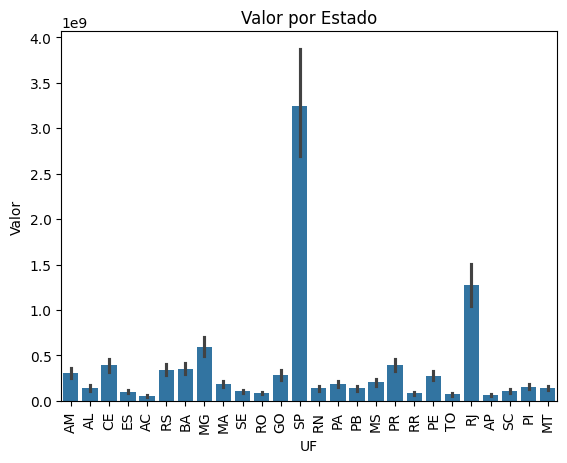

In [9]:
# Grafico de barras que relaciona o valor pago em contas por estado (UF)

sns.barplot(x='UF', y='Valor', data=dataset_copia)
plt.title('Valor por Estado')
plt.xlabel('UF')
plt.ylabel('Valor')
plt.xticks(rotation=90)  
plt.show()


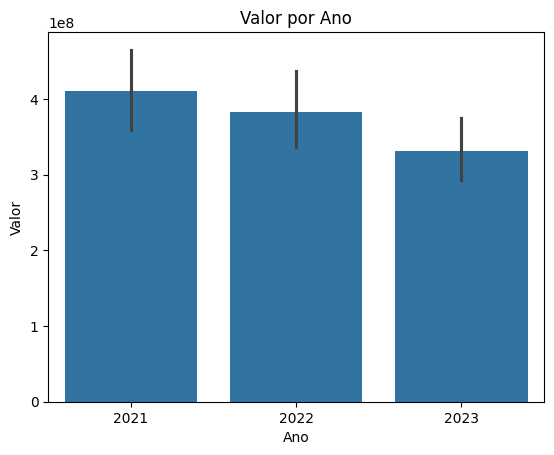

In [10]:
# Grafico que mostra o valor gasto em contas por ano
sns.barplot(x='Ano', y='Valor', data=dados)
plt.title('Valor por Ano')
plt.show()


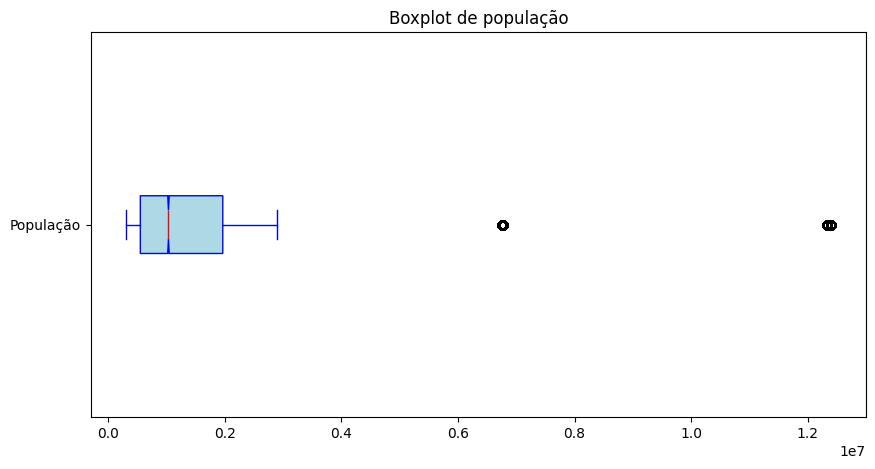

In [11]:
# Criando um boxplot para a coluna População 
plt.figure(figsize=(10, 5))
plt.boxplot(dataset_copia['População'], notch=True, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.yticks([1], ['População'])
plt.title('Boxplot de população')
plt.show()

Outliers encontrados:
0        7.819839e+08
1        2.688272e+08
12       4.301373e+08
26       6.862631e+08
27       6.862631e+08
             ...     
30183    3.659352e+08
30194    3.909048e+08
30199    2.388473e+08
30200    7.719368e+08
30202    2.771097e+08
Name: Valor, Length: 3640, dtype: float64
Quantidade de outliers: 3640


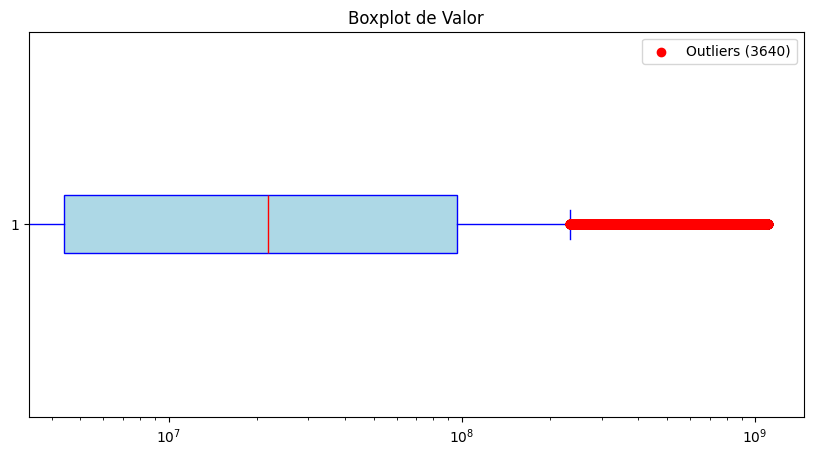

In [15]:

# Calculando Q1 (primeiro quartil) e Q3 (terceiro quartil)
Q1 = np.percentile(dataset_copia['Valor'], 25)
Q3 = np.percentile(dataset_copia['Valor'], 75)

# Calculando o IQR (intervalo interquartil)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = dataset_copia['Valor'][(dataset_copia['Valor'] < limite_inferior) | 
                                  (dataset_copia['Valor'] > limite_superior)]

# Exibindo os outliers
print("Outliers encontrados:")
print(outliers)


# Quantidade de outliers
quantidade_outliers = len(outliers)
print(f"Quantidade de outliers: {quantidade_outliers}")

# Boxplot para a coluna 'Valor'
plt.figure(figsize=(10, 5))
plt.boxplot(dataset_copia['Valor'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            )

# Destacando os outliers com pontos vermelhos
plt.scatter(outliers, np.ones(len(outliers)), color='red', zorder=2, label=f'Outliers ({quantidade_outliers})')

plt.xscale('log')  # Colocando o eixo x em escala logarítmica, pois os valores variam muito
plt.title('Boxplot de Valor')
plt.legend()
plt.show()


In [14]:
# Removendo outliers
dataset_copia = dataset_copia[(dados['Valor'] < dados['Valor'].quantile(0.95))]
dataset_copia = dataset_copia[(dados['População'] < dados['População'].quantile(0.95))]

C:\Users\jvitt\AppData\Local\Temp\ipykernel_8644\2642422559.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_copia = dataset_copia[(dados['Valor'] < dados['Valor'].quantile(0.95))]
C:\Users\jvitt\AppData\Local\Temp\ipykernel_8644\2642422559.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_copia = dataset_copia[(dados['População'] < dados['População'].quantile(0.95))]
